In [42]:
import pandas as pd
import seaborn as sns
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, roc_auc_score
%matplotlib inline

In [43]:
from bs4 import BeautifulSoup
import re
import string
import nltk
from nltk.corpus import stopwords

In [44]:
df = pd.read_csv(r'spam.csv', encoding='latin-1')

In [45]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [46]:
df.drop(columns= ["Unnamed: 2","Unnamed: 3","Unnamed: 4" ], axis=1, inplace=True)

In [47]:
df.rename(columns= {"v1":"label","v2":"text"}, inplace=True)

In [48]:
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [49]:
df.shape

(5572, 2)

In [50]:
df.info

<bound method DataFrame.info of      label                                               text
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham              Will Ì_ b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]>

In [51]:
df.isnull().sum()

label    0
text     0
dtype: int64

In [52]:
df.drop_duplicates(inplace=True)

In [53]:
df.shape

(5169, 2)

In [54]:
df["label"].value_counts()

ham     4516
spam     653
Name: label, dtype: int64

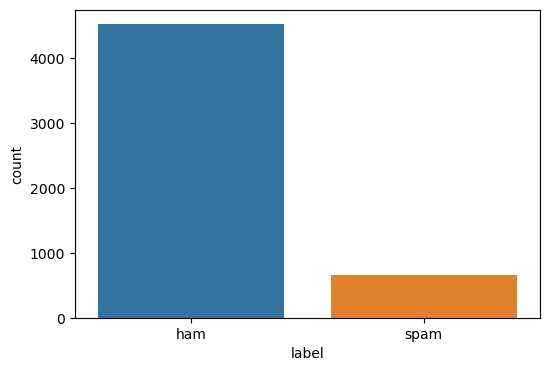

In [55]:
plt.figure(figsize=(6,4))
sns.countplot(x="label",data=df)
plt.show()

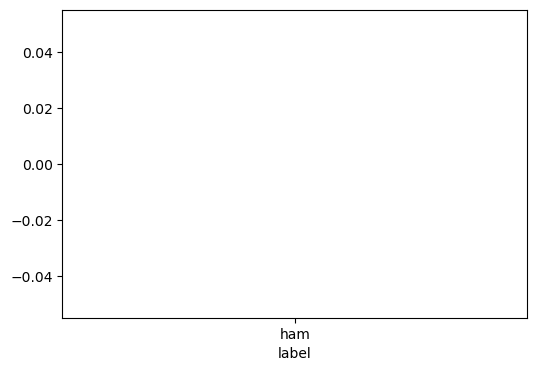

In [56]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="label",data=df)
plt.show()

In [57]:
df['label'].replace({"ham": 0, "spam": 1}, inplace=True)

In [58]:
df.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [59]:
df["text"]

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5169, dtype: object

In [60]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chari\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [61]:
 def clean_text(text):  
    text = BeautifulSoup(text ,'html.parser').get_text()
      # Remove special characters and digits
    text = re.sub(r"[^a-zA-Z]", " ", text)

    # Remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))

    # Remove emojis
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)
    
    # Convert to lowercase
    text = text.lower()

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = nltk.word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]

    return ' '.join(tokens)

In [62]:
df["text"].apply(clean_text)

c:\Users\chari\anaconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


0       go jurong point crazy available bugis n great ...
1                                 ok lar joking wif u oni
2       free entry wkly comp win fa cup final tkts st ...
3                     u dun say early hor u c already say
4                  nah think goes usf lives around though
                              ...                        
5567    nd time tried contact u u pound prize claim ea...
5568                            b going esplanade fr home
5569                                pity mood suggestions
5570    guy bitching acted like interested buying some...
5571                                       rofl true name
Name: text, Length: 5169, dtype: object

In [63]:
df['number_character']=df['text'].apply(len)
df['number_of_words'] = df['text'].apply(lambda x: len(x.split()))
df['number_sentence'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [64]:
df.head()

,label,text,number_character,number_of_words,number_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,20,2
1,0,Ok lar... Joking wif u oni...,29,6,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,2
3,0,U dun say so early hor... U c already then say...,49,11,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,1


In [65]:
df.describe()

,label,number_character,number_of_words,number_sentence
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,15.340685,1.947185
std,0.332253,58.236293,11.068488,1.362406
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,7.000000,1.000000
50%,0.000000,60.000000,12.000000,1.000000
75%,0.000000,117.000000,22.000000,2.000000
max,1.000000,910.000000,171.000000,28.000000


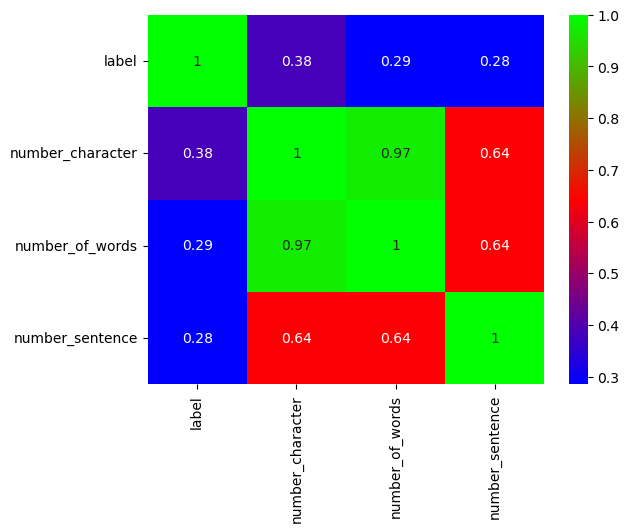

In [66]:
corr=df.select_dtypes(["int"]).corr()
sns.heatmap(corr,annot=True,cmap="brg")
plt.show()

In [67]:
df[df["label"]==1][["number_character","number_of_words","number_sentence"]].describe()

,number_character,number_of_words,number_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,23.681470,2.967841
std,30.137753,5.967672,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,22.000000,2.000000
50%,149.000000,25.000000,3.000000
75%,157.000000,28.000000,4.000000
max,224.000000,35.000000,8.000000


In [68]:
df[df["label"]==0][["number_character","number_of_words","number_sentence"]].describe()


,number_character,number_of_words,number_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,14.134632,1.799601
std,56.358207,11.116240,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,7.000000,1.000000
50%,52.000000,11.000000,1.000000
75%,90.000000,18.000000,2.000000
max,910.000000,171.000000,28.000000


In [69]:
df[["number_character","number_of_words","number_sentence"]].describe()

,number_character,number_of_words,number_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,15.340685,1.947185
std,58.236293,11.068488,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,7.000000,1.000000
50%,60.000000,12.000000,1.000000
75%,117.000000,22.000000,2.000000
max,910.000000,171.000000,28.000000


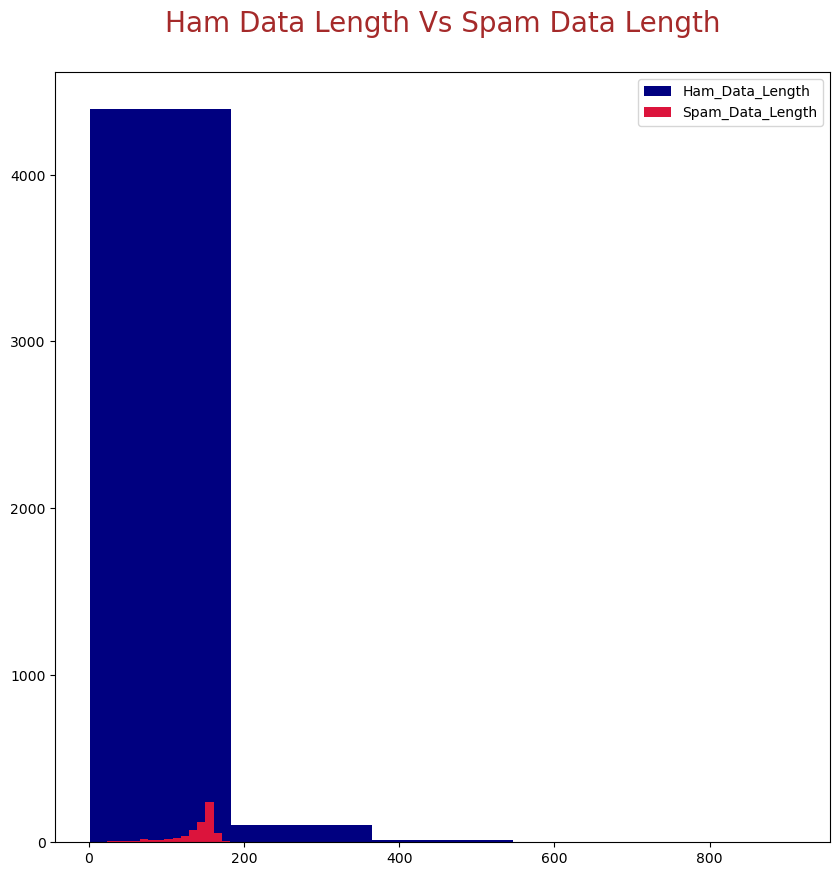

In [70]:
ham_data_len=df[df["label"]==0]["text"].str.len()
spam_data_len=df[df["label"]==1]["text"].str.len()
plt.figure(figsize=(10,10))
plt.hist(ham_data_len, bins=5,label='Ham_Data_Length',color="navy")
plt.hist(spam_data_len , bins=20, label='Spam_Data_Length',color="crimson")
plt.title("Ham Data Length Vs Spam Data Length\n",fontsize=20,color="brown")
plt.legend()
plt.show()

In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
tf=TfidfVectorizer()
X=tf.fit_transform(df["text"])
label_encoder = LabelEncoder()
Y= label_encoder.fit_transform(df["label"])

In [72]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [73]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train, Y_train)
pred = mnb.predict(X_test)

acc = accuracy_score(Y_test, pred)
print("Multinomial Naive Bayes Accuracy:",acc)

Multinomial Naive Bayes Accuracy: 0.9555125725338491


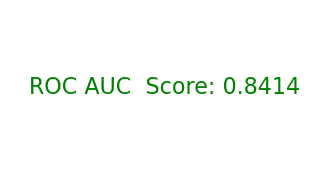

In [74]:
plt.figure(figsize=(4,2))
roc_auc = roc_auc_score(Y_test, pred)
plt.plot([])
plt.text(0,0, f'ROC AUC  Score: {roc_auc:.4f}', fontsize=16, ha='center', va='center',color="green")
plt.axis('off')

# Set the x-axis limits
plt.xlim(-1, 1)
plt.ylim(-1,1)

plt.show()

# Custom data prediction

In [75]:
custom_data = ["Banks rarely text their customers with important information or updates. Scammers frequently pose as banks to trick customers into revealing valuable information.Example: ACTION REQUIRED. Please verify your Bank of America account information to avoid a hold on your account. Click here to confirm: [Link]"]

custom_data_transformed = tf.transform(custom_data)


predictions = mnb.predict(custom_data_transformed)

if predictions==0:
    print("Message is Ham")
else:
    print("Message is Spam")

Message is Ham
